(0.0, 5.1)

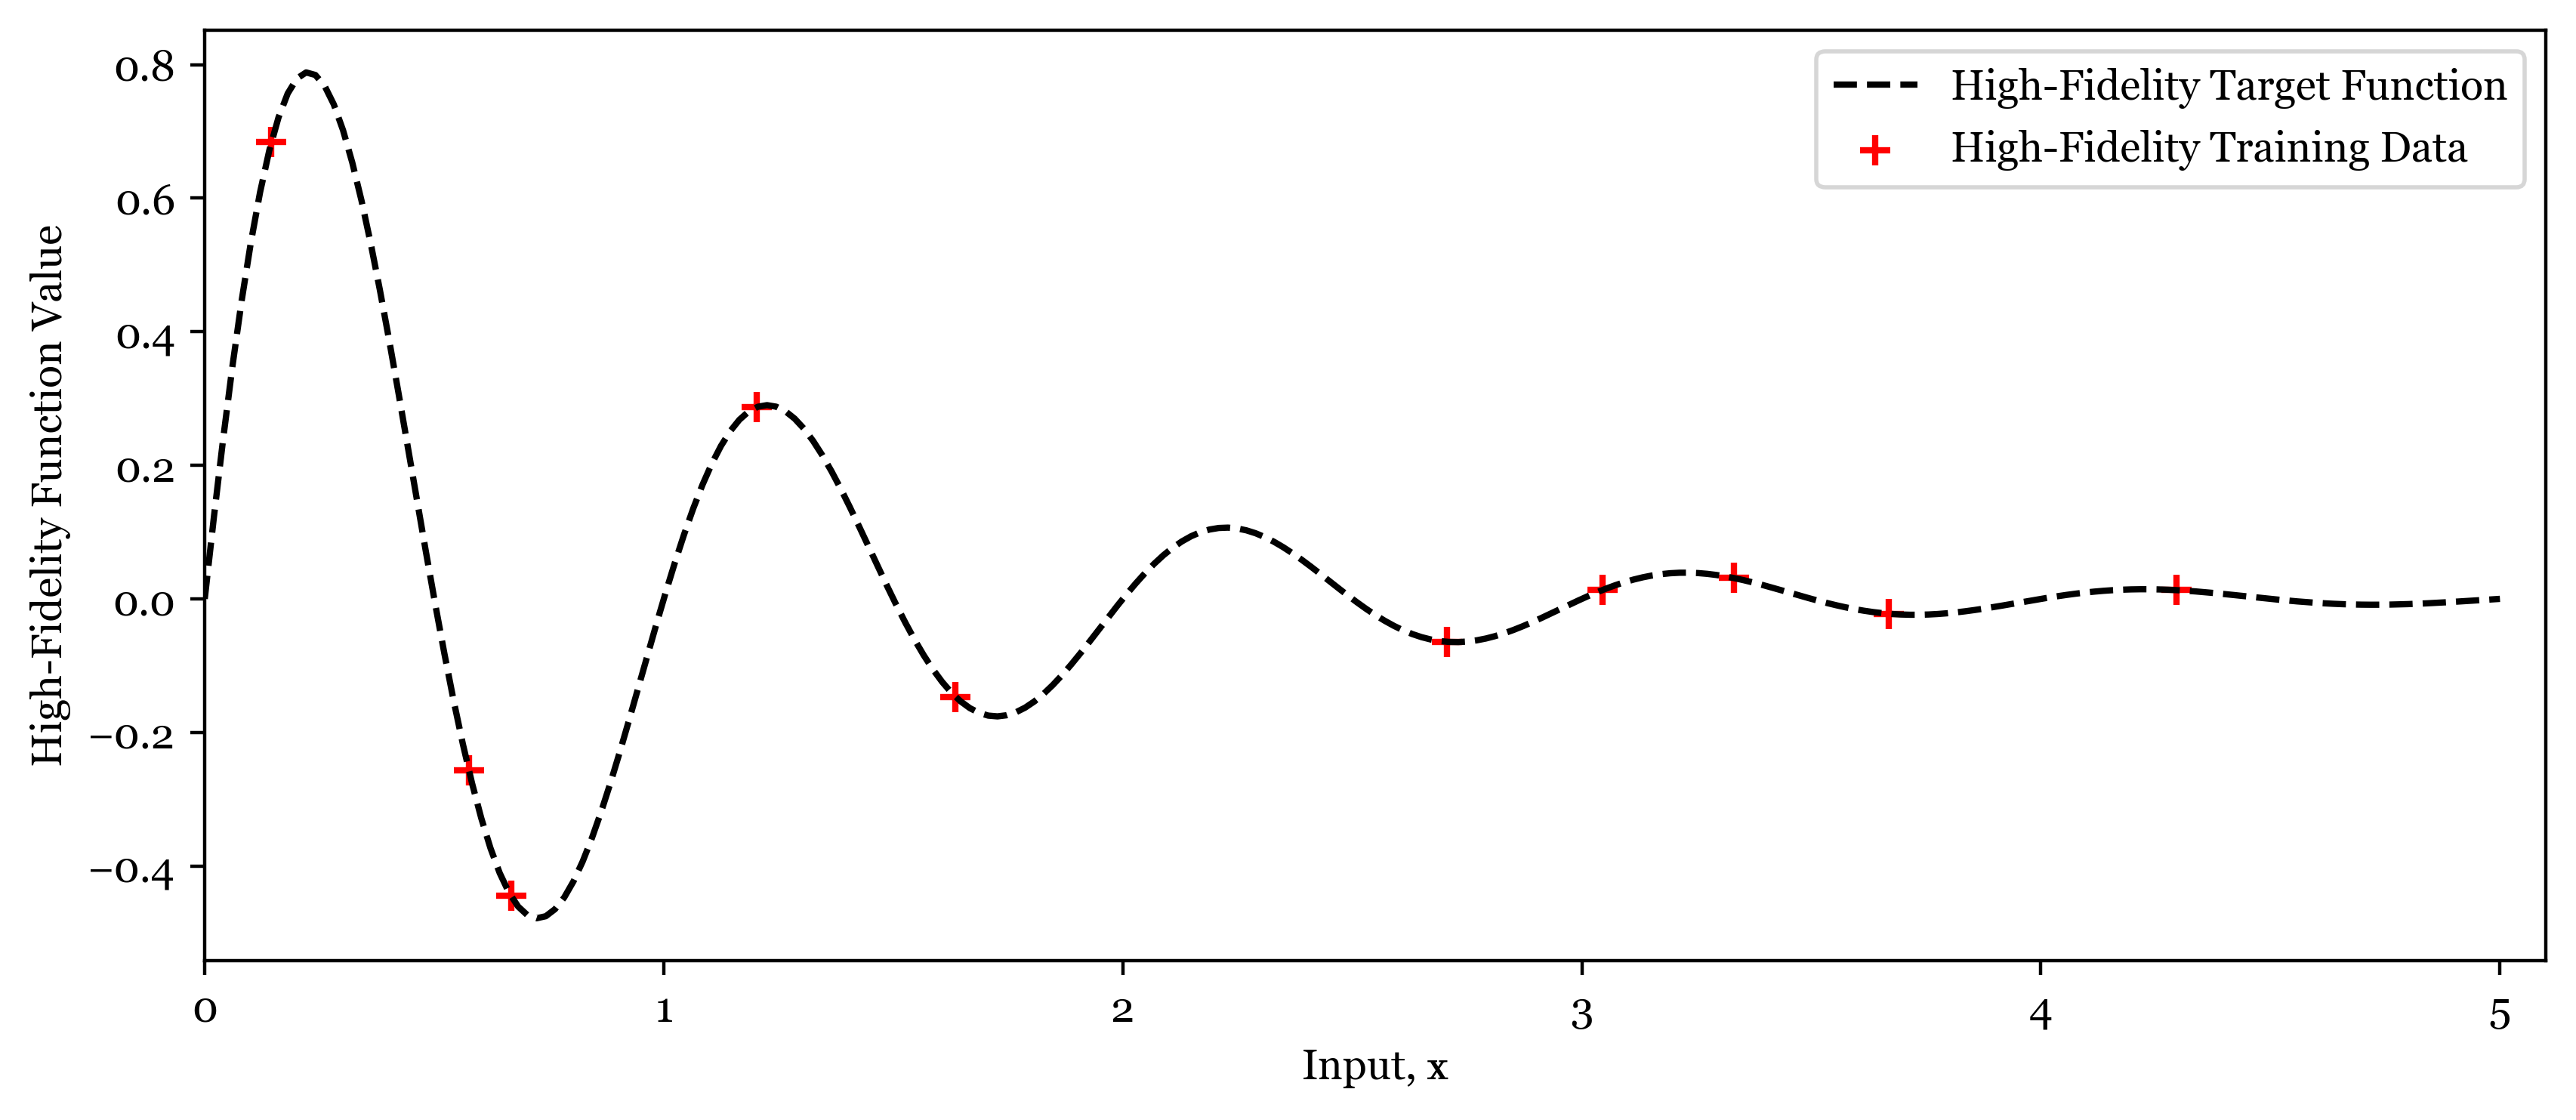

In [1]:
import sys
sys.path.append("..")   # add parent folder (project/) to Python path
from gplib.mf import *   # now absolute import worksimport math import math 
import matplotlib.pyplot as plt 

# Plot parameters 
plt.rcParams.update({
    "font.family": "georgia",
    'text.latex.preamble': r'\\usepackage{amsmath}',
    'mathtext.fontset': 'cm',
})
# Define number of fidelity-levels 
n_fidelities = 3 

# Define a list of sample sizes
sample_sizes = [10, 100, 250]

# Define the high and low-fidelity functions
funcs = [
    lambda x: np.exp(-x) * np.sin(2*math.pi*x), 
    lambda x: np.sin(2*math.pi*x),
    lambda x: np.exp(-x)
]

# Making some testing data 
Xtest = np.linspace(0.0, 5.0, 250).reshape(-1,1)

# Loading high-fidelity data
true_data = np.hstack((Xtest, funcs[0](Xtest)))

# Selecting optimal high-fidelity data
np.random.seed(43)
cutoff = 0.0
X_hf = np.random.uniform(cutoff, 5.0, size = sample_sizes[0]).reshape(-1,1)
hf_data = np.hstack((X_hf, funcs[0](X_hf)))

# Loading medium-fidelity data 
X_mf = np.random.uniform(0.0, 5.0, size = sample_sizes[1]).reshape(-1,1)
mf_data = np.hstack((X_mf, funcs[1](X_mf)))

# Loading low-fidelity data 
X_lf = np.random.uniform(0.0, 5.0, size = sample_sizes[2]).reshape(-1,1)
lf_data = np.hstack((X_lf, funcs[2](X_lf)))

# Creating a multi-fidelity-friendly data dictionary 
data_dict = {
    2:{
        'X':hf_data[:,0].reshape(-1,1),
        'Y':hf_data[:,1],
        'noise_var':1e-6,
        'var':np.var(hf_data[:,1]),
        'cost':100.0
    },
    1:{
        'X':mf_data[:,0].reshape(-1,1),
        'Y':mf_data[:,1],
        'noise_var':1e-6,
        'var':np.var(mf_data[:,1]),
        'cost':2.0
    },
    0:{
        'X':lf_data[:,0].reshape(-1,1),
        'Y':lf_data[:,1],
        'noise_var':1e-6,
        'var':np.var(lf_data[:,1]),
        'cost':1.0
    }
}


plt.figure(figsize=(10,4),dpi = 400)
plt.plot(Xtest.ravel(), funcs[0](Xtest).ravel(), linestyle = 'dashed', color = 'black', label = 'High-Fidelity Target Function')
plt.scatter(hf_data[:,0], hf_data[:,1], s = 50, marker = '+', color = 'red', label = 'High-Fidelity Training Data')

plt.xlabel("Input, $\mathbf{x}$")
plt.ylabel("High-Fidelity Function Value")
plt.legend()
plt.xlim([0,5.1])

In [2]:
np.corrcoef(funcs[0](Xtest).ravel(), funcs[2](Xtest.ravel()))

array([[1.        , 0.41729509],
       [0.41729509, 1.        ]])

In [3]:
# Instantiating the Hyperkriging model 
model = Hyperkriging(
    data_dict, RBF, Linear, max_cond = 1e5, epsilon = 1e-12
)

# Training GP-surrogate for lowest level of fidelity 
model.optimize(0, params = ['k_param', 'm_param', 'noise_var'], lr = 1e-2, epochs = 250, beta = 0.95, k = 50)

Calibrated white noise variance: 2.3225e-05
Calibrated white noise variance: 1.1739e-04
Calibrated white noise variance: 1.0000e-06
Best Objective Value: -1.0581e+03


100%|██████████| 250/250 [00:02<00:00, 84.79it/s, Loss: -3.0675e+03]


In [4]:
model.optimize(1, params = ['k_param', 'm_param', 'noise_var'], lr = 1e-3, epochs = 250, beta = 0.95, k = 50)

Best Objective Value: -2.5082e+02


100%|██████████| 250/250 [00:02<00:00, 93.13it/s, Loss: -9.3976e+02]


In [5]:
model.optimize(2, params = ['k_param', 'm_param', 'noise_var'], lr = 1e-3, epochs = 1000, beta = 0.99, k = 100)

Best Objective Value: -7.9621e+00


100%|██████████| 1000/1000 [00:11<00:00, 88.68it/s, Loss: -9.0288e+00]


In [ ]:
# Instantiating the Hyperkriging model 
koh = KennedyOHagan(
    data_dict, RBF, Linear, max_cond = 1e5, epsilon = 1e-12
)

# Training GP-surrogate for lowest level of fidelity 
koh.optimize(0, params = ['k_param', 'm_param', 'rho', 'noise_var'], lr = 1e-3, epochs = 250, beta = 0.95)

Calibrated white noise variance: 2.4413e-02
Calibrated white noise variance: 1.2783e-01
Calibrated white noise variance: 1.0000e-06
Best Objective Value: -2.1648e+02


100%|██████████| 250/250 [00:03<00:00, 77.27it/s, Loss: -3.0657e+03]


In [ ]:
koh.optimize(1, params = ['k_param', 'm_param', 'rho', 'noise_var'], lr = 1e-3, epochs = 250, beta = 0.95)

Best Objective Value: 1.1675e+02


 92%|█████████▏| 231/250 [00:03<00:00, 64.81it/s, Loss: 9.3325e+01]

In [ ]:
koh.optimize(2, params = ['k_param', 'm_param', 'rho', 'noise_var'], lr = 1e-4, epochs = 2500, beta = 0.95)

Best Objective Value: 1.9228e+01


 14%|█▍        | 354/2500 [00:06<00:32, 65.22it/s, Loss: 1.8652e+01]

In [ ]:
# Instantiating the NARGP model 
nargp = NARGP(
    data_dict, RBF, Linear, max_cond = 1e5, epsilon = 1e-12
)

# Training GP-surrogate for lowest level of fidelity 
nargp.optimize(0, params = ['k_param', 'm_param', 'noise_var'], lr = 1e-3, epochs = 500, beta = 0.95)

Calibrated white noise variance: 6.0240e-05
Calibrated white noise variance: 3.0448e-04
Calibrated white noise variance: 1.0000e-06
Best Objective Value: -9.4352e+02


100%|██████████| 500/500 [00:06<00:00, 72.39it/s, Loss: -3.0668e+03]


In [ ]:
nargp.optimize(1, params = ['k_param', 'm_param', 'noise_var'], lr = 1e-3, epochs = 500, beta = 0.95)

Best Objective Value: -1.4185e+02


100%|██████████| 500/500 [00:06<00:00, 81.97it/s, Loss: -9.4246e+02]


In [ ]:
nargp.optimize(2, params = ['k_param', 'm_param', 'noise_var'], lr = 1e-3, epochs = 500, beta = 0.95)

Best Objective Value: -4.0387e-02


100%|██████████| 500/500 [00:06<00:00, 81.96it/s, Loss: -3.4991e+00]


In [ ]:
kr_model = GP(data_dict[2]['X'], data_dict[2]['Y'], RBF, Linear, kernel_params = jnp.ones(2), noise_var = 1e-9, epsilon = 1e-8, max_cond = 1e5, calibrate=True)
optimizer = Momentum(kr_model, neg_mll, beta = 0.9)
optimizer.kernel_latin_hypercube(15, min=-50, max = 50)

Calibrated white noise variance: 1.0000e-09
Best Objective Value: 1.6898e+01


In [ ]:
optimizer.run(1e-3, 1000, ['k_param', 'm_param', 'noise_var'])

100%|██████████| 1000/1000 [00:12<00:00, 81.33it/s, Loss: 4.8166e-01]


In [ ]:
# Making the Hyperkriging predictions at the testing data 
hk_mean, hk_cov = model.predict(Xtest, 2, full_cov = False) 
hk_conf = 1.96 * np.sqrt(hk_cov)

In [ ]:
# Making the Hyperkriging predictions at the testing data 
koh_mean, koh_cov = koh.predict(Xtest, 2) 
koh_conf = 1.96 * np.sqrt(np.diag(koh_cov))

In [ ]:
# Making the Hyperkriging predictions at the testing data 
nargp_mean, nargp_cov = nargp.predict(Xtest, 2, full_cov = False) 
nargp_conf = 1.96 * np.sqrt(nargp_cov)

In [ ]:
# Making the Hyperkriging predictions at the testing data 
kr_mean, kr_cov = kr_model.predict(Xtest, full_cov = False) 
kr_conf = 1.96 * np.sqrt(kr_cov)

(0.0, 5.0)

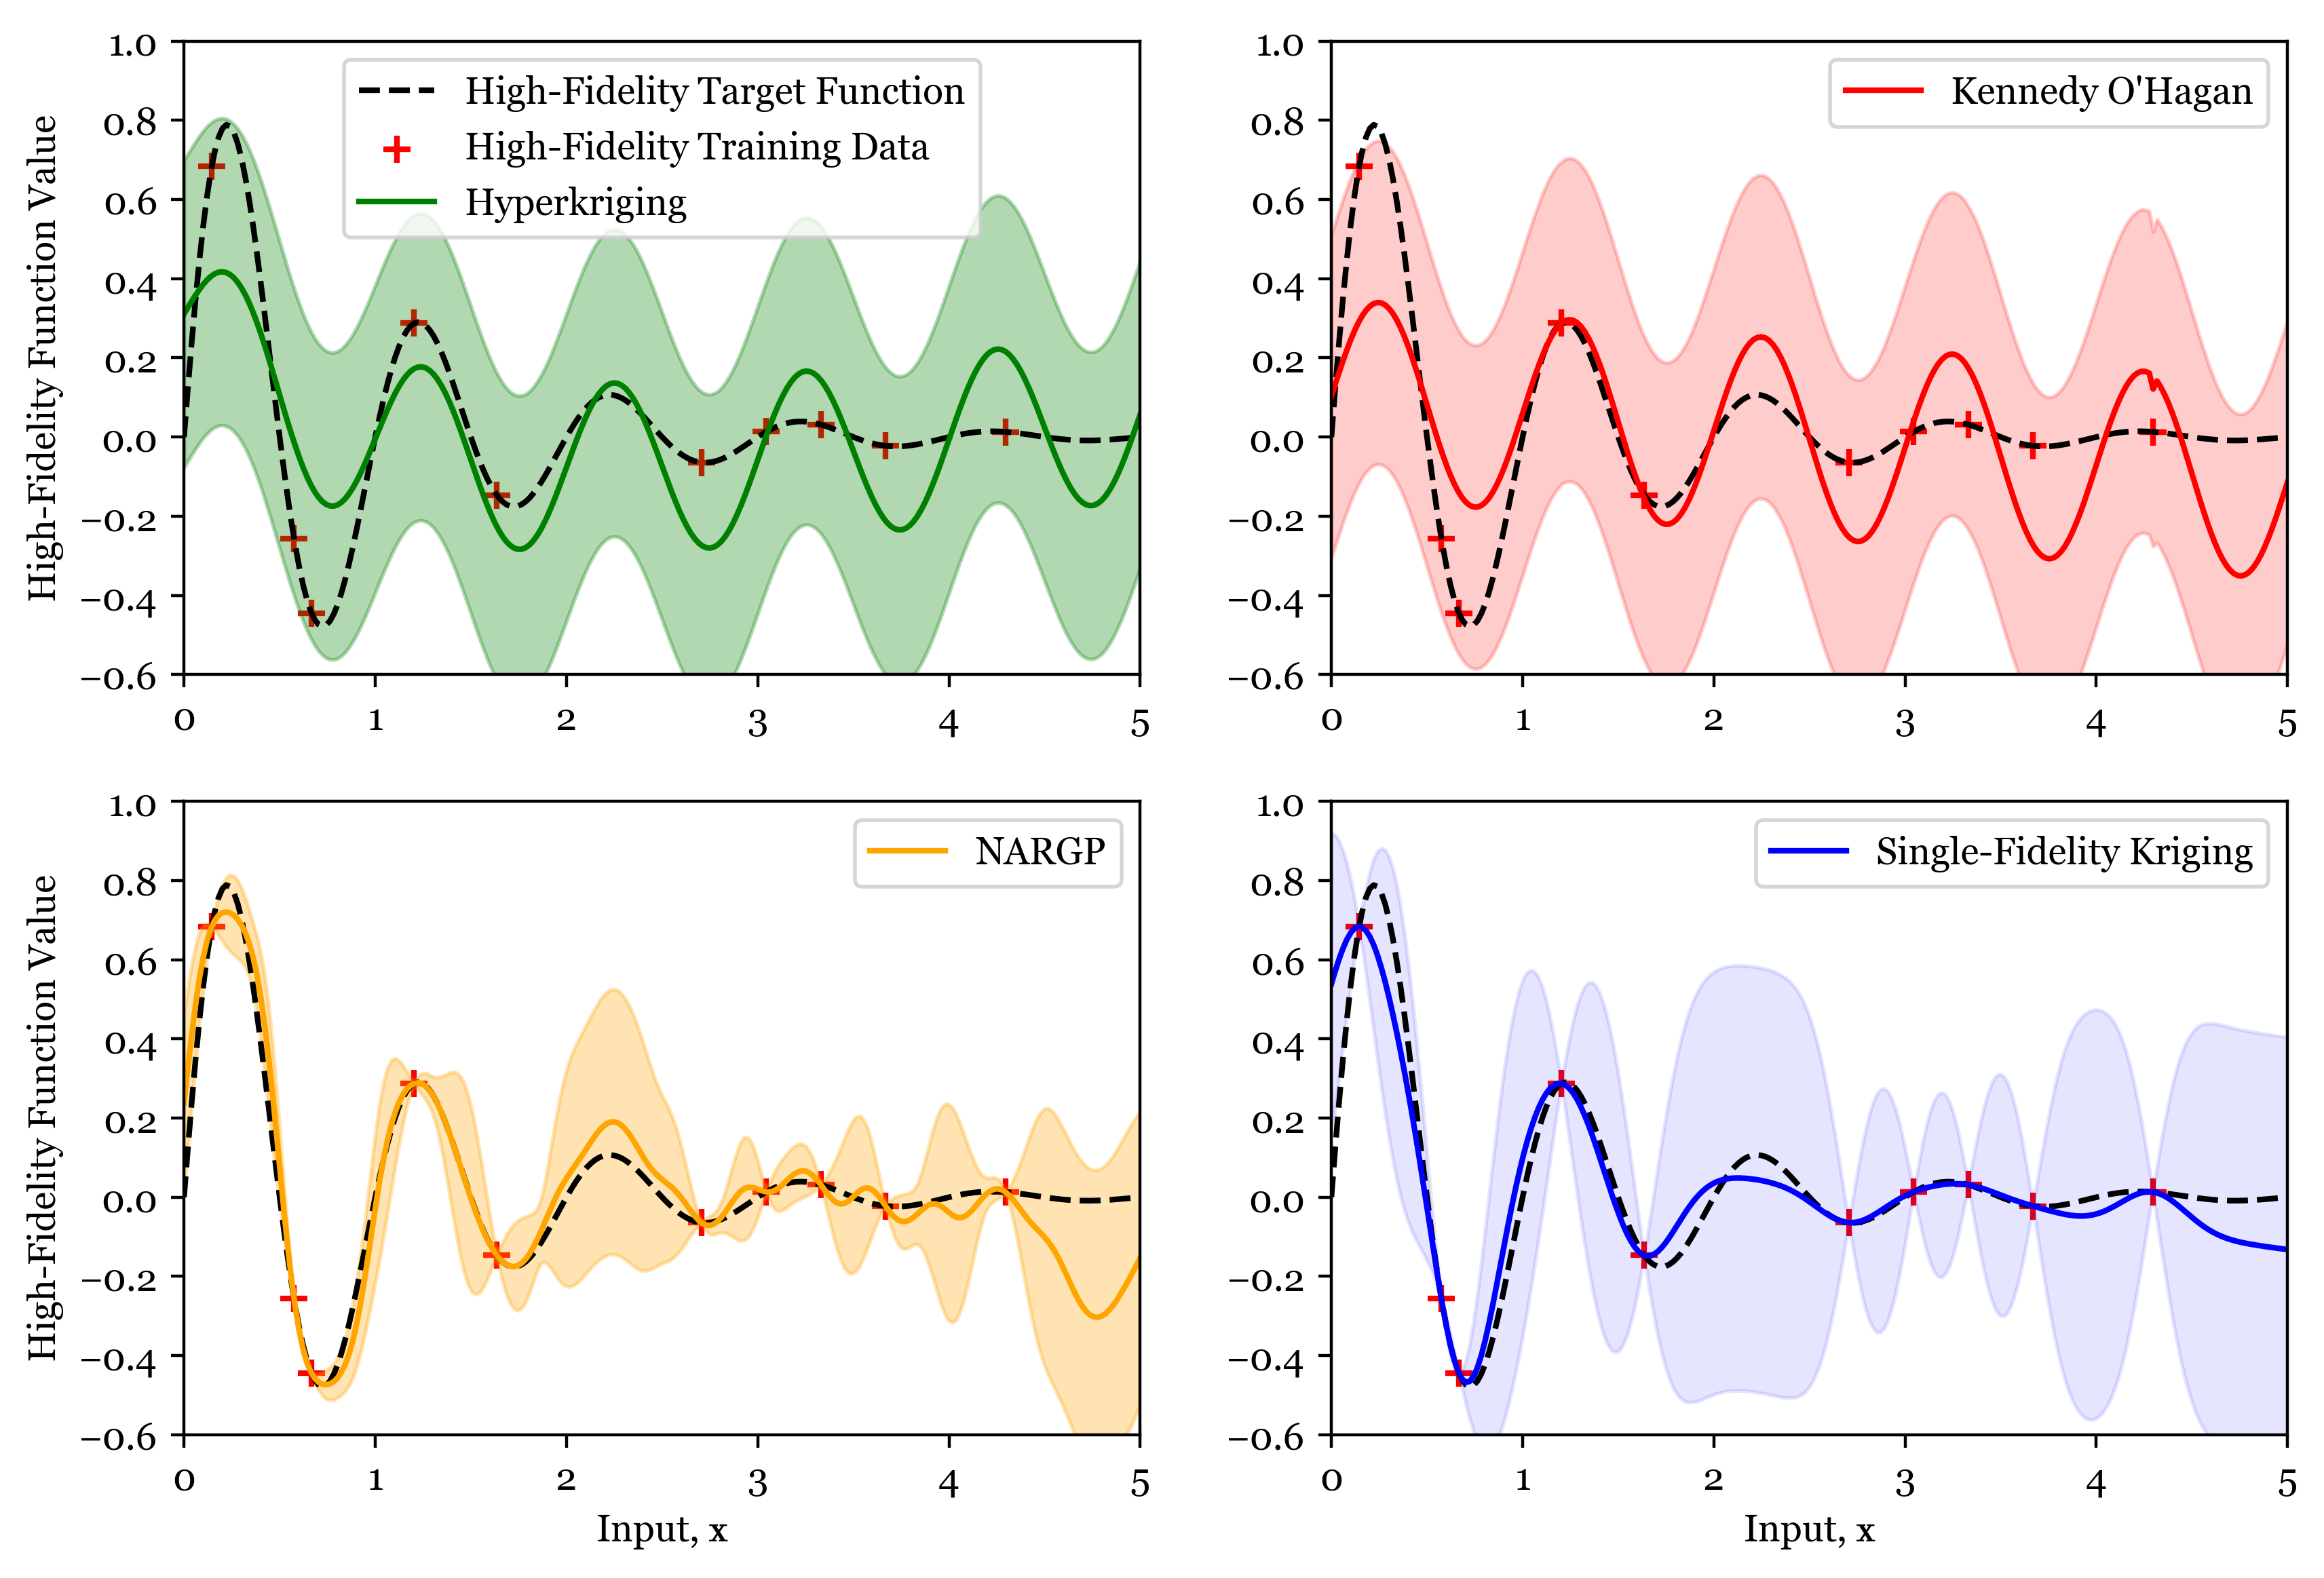

In [ ]:
plt.figure(figsize=(10,6.67),dpi = 400)
plt.subplot(2,2,1)
plt.plot(Xtest.ravel(), funcs[0](Xtest).ravel(), linestyle = 'dashed', color = 'black', label = 'High-Fidelity Target Function')
plt.scatter(hf_data[:,0], hf_data[:,1], s = 50, marker = '+', color = 'red', label = 'High-Fidelity Training Data')
plt.plot(Xtest.ravel(), hk_mean.ravel(), color = 'green', label = "Hyperkriging")
plt.fill_between(Xtest.ravel(), hk_mean.ravel() - hk_conf, hk_mean.ravel() + hk_conf, color = 'green', alpha = 0.3)
plt.ylabel("High-Fidelity Function Value")
plt.legend()
plt.ylim(-0.6, 1.0)
plt.xlim(0,5)

plt.subplot(2,2,2)
# Kennedy O'Hagan Prediction 
plt.plot(Xtest.ravel(), funcs[0](Xtest).ravel(), linestyle = 'dashed', color = 'black')
plt.scatter(hf_data[:,0], hf_data[:,1], s = 50, marker = '+', color = 'red')
plt.plot(Xtest.ravel(), koh_mean.ravel(), color = 'red', label = "Kennedy O'Hagan")
plt.fill_between(Xtest.ravel(), koh_mean.ravel() - koh_conf, koh_mean.ravel() + koh_conf, color = 'red', alpha = 0.2)
plt.legend()
plt.ylim(-0.6, 1.0)
plt.xlim(0,5)

plt.subplot(2,2,3)
# NARGP Prediction 
plt.plot(Xtest.ravel(), funcs[0](Xtest).ravel(), linestyle = 'dashed', color = 'black')
plt.scatter(hf_data[:,0], hf_data[:,1], s = 50, marker = '+', color = 'red')
plt.plot(Xtest.ravel(), nargp_mean.ravel(), color = 'orange', label = "NARGP")
plt.fill_between(Xtest.ravel(), nargp_mean.ravel() - nargp_conf, nargp_mean.ravel() + nargp_conf, color = 'orange', alpha = 0.3)
plt.legend()
plt.xlabel("Input, $\mathbf{x}$")
plt.ylabel("High-Fidelity Function Value")
plt.ylim(-0.6, 1.0)
plt.xlim(0,5)

# Kriging Prediction 
plt.subplot(2,2,4)
plt.plot(Xtest.ravel(), funcs[0](Xtest).ravel(), linestyle = 'dashed', color = 'black')
plt.scatter(hf_data[:,0], hf_data[:,1], s = 50, marker = '+', color = 'red')
plt.plot(Xtest.ravel(), kr_mean.ravel(), color = 'blue', label = "Single-Fidelity Kriging")
plt.fill_between(Xtest.ravel(), kr_mean.ravel() - kr_conf, kr_mean.ravel() + kr_conf, color = 'blue', alpha = 0.1)
plt.legend()
plt.xlabel("Input, $\mathbf{x}$")
plt.ylim(-0.6, 1.0)
plt.xlim(0,5)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE 
from scipy.linalg import cholesky, cho_solve
Ytest = funcs[0](Xtest)

def log_prob(x, mean, cov, jitter = 1e-3):
    C = 0.5 * (cov + cov.T)       # enforce symmetry
    C = C + jitter * np.eye(C.shape[0])
    h = (x.ravel() - mean.ravel())
    L = cholesky(C, lower=True)
    return -0.5*(np.inner(h, cho_solve((L, True), h)) + 2 * np.sum(np.log(np.diag(L))) + len(h) * np.log(2 * math.pi))

print("Method           RMSE         R^2      log MLL")
print("--------------------------------------------------")
print("Hyperkriging:    %.3e    %.4f    %.4f" % (np.sqrt(MSE(Ytest, hk_mean)), np.corrcoef(Ytest.ravel(), hk_mean.ravel())[0,1], -neg_mll(model.d[2]['model'], model.d[2]['model'].p)))
print("Kennedy O'Hagan: %.3e    %.4f    %.4f" % (np.sqrt(MSE(Ytest, koh_mean)), np.corrcoef(Ytest.ravel(), koh_mean.ravel())[0,1], -delta_neg_mll(koh.d[2]['model'], koh.d[2]['model'].p)))
print("NARGP:           %.3e    %.4f    %.4f" % (np.sqrt(MSE(Ytest, nargp_mean)), np.corrcoef(Ytest.ravel(), nargp_mean.ravel())[0,1], -neg_mll(nargp.d[2]['model'], nargp.d[2]['model'].p)))
print("Kriging:         %.3e    %.4f    %.4f" % (np.sqrt(MSE(Ytest, kr_mean)), np.corrcoef(Ytest.ravel(), kr_mean.ravel())[0,1], -neg_mll(kr_model, kr_model.p)))

Method           RMSE         R^2      log MLL
--------------------------------------------------
Hyperkriging:    1.504e-01    0.7445    2.0131
Kennedy O'Hagan: 1.775e-01    0.6512    1.4861
NARGP:           8.652e-02    0.9376    3.4993
Kriging:         8.211e-02    0.9281    -0.4817
